In [3]:
import pandas as pd
import numpy as np 

In [6]:
dataset = pd.read_csv('dataset.csv')
dataset.head()

,Latitude,Longitude,Data Throughput (Mbps),Latency (ms),Network Type,Serviço,RAM,CPU,CPU e RAM,Peso,Hora,Prioridade
0,25.599109,85.137355,1.863890,129.122914,3G,Tempo Real,1,0,0,1.0,12:50:40,2
1,25.433286,85.070053,5.132296,54.883606,4G,Consulta,0,0,1,0.1,12:53:47.210173,1
2,25.498809,85.211371,1.176985,119.598286,LTE,Consulta,0,0,1,0.3,12:56:54.420346,1
3,25.735138,85.208400,68.596932,46.598387,5G,Consulta,0,0,1,0.1,13:00:01.630519,1
4,25.538556,85.159860,38.292038,30.342828,5G,Consulta,0,0,1,0.1,13:03:08.840692,1


In [7]:
df2 = dataset.drop(['Locality', 'Signal Strength (dBm)', 'Signal Quality (%)','BB60C Measurement (dBm)', 'srsRAN Measurement (dBm)', 'BladeRFxA9 Measurement (dBm)'], axis=1)

KeyError: "['Locality', 'Signal Strength (dBm)', 'Signal Quality (%)', 'BB60C Measurement (dBm)', 'srsRAN Measurement (dBm)', 'BladeRFxA9 Measurement (dBm)'] not found in axis"

In [208]:
df2.head()

,Timestamp,Latitude,Longitude,Data Throughput (Mbps),Latency (ms),Network Type
0,2023-05-05 12:50:40.000000,25.599109,85.137355,1.863890,129.122914,3G
1,2023-05-05 12:53:47.210173,25.433286,85.070053,5.132296,54.883606,4G
2,2023-05-05 12:56:54.420346,25.498809,85.211371,1.176985,119.598286,LTE
3,2023-05-05 13:00:01.630519,25.735138,85.208400,68.596932,46.598387,5G
4,2023-05-05 13:03:08.840692,25.538556,85.159860,38.292038,30.342828,5G


In [209]:
len(df2.index)

16829

In [5]:

import pandas as pd
import random

recursos = ["RAM", "CPU", "RAM e CPU"]
servicos = ["I/O", "Armazenamento", "Tempo Real", "Consulta"]

# Cria um dicionário com as colunas
data = {
    "Recursos": [random.choice(recursos) for _ in range(16829)],
    "Serviço": [random.choice(servicos) for _ in range(16829)],
}

# Cria o DataFrame
df = pd.DataFrame(data)

# Transforma a coluna "Recursos" em três colunas separadas
df['RAM'] = df['Recursos'].apply(lambda x: 1 if x == 'RAM' else 0)
df['CPU'] = df['Recursos'].apply(lambda x: 1 if x == 'CPU' else 0)
df['CPU e RAM'] = df['Recursos'].apply(lambda x: 1 if x == 'RAM e CPU' else 0)

# Remove a coluna "Recursos" original
df.drop('Recursos', axis=1, inplace=True)

# Adiciona a coluna "Prioridade" com base na regra especificada
df['Prioridade'] = df['Serviço'].map({
    'I/O': 2,
    'Armazenamento': 0,
    'Tempo Real': 2,
    'Consulta': 1
})






In [211]:
df["Prioridade"] = df["Prioridade"].astype(int)

In [212]:
dataset = df2.join(df)

In [213]:
dataset.head(30)

,Timestamp,Latitude,Longitude,Data Throughput (Mbps),Latency (ms),Network Type,Serviço,RAM,CPU,CPU e RAM,Prioridade
0,2023-05-05 12:50:40.000000,25.599109,85.137355,1.863890,129.122914,3G,Tempo Real,1,0,0,2
1,2023-05-05 12:53:47.210173,25.433286,85.070053,5.132296,54.883606,4G,Consulta,0,0,1,1
2,2023-05-05 12:56:54.420346,25.498809,85.211371,1.176985,119.598286,LTE,Consulta,0,0,1,1
3,2023-05-05 13:00:01.630519,25.735138,85.208400,68.596932,46.598387,5G,Consulta,0,0,1,1
4,2023-05-05 13:03:08.840692,25.538556,85.159860,38.292038,30.342828,5G,Consulta,0,0,1,1
5,2023-05-05 13:06:16.050865,25.640701,85.014134,1.712596,190.682844,LTE,I/O,0,1,0,2
6,2023-05-05 13:09:23.261038,25.766333,85.096190,4.036609,99.887024,4G,Armazenamento,1,0,0,0
7,2023-05-05 13:12:30.471211,25.640104,85.033861,2.670605,132.078006,LTE,Armazenamento,0,0,1,0
8,2023-05-05 13:15:37.681384,25.585705,85.305704,2.992507,196.541935,LTE,Consulta,1,0,0,1
9,2023-05-05 13:18:44.891557,25.564499,85.088607,1.567842,130.536386,3G,Consulta,1,0,0,1


In [215]:


def calcular_peso(row):
   
    if row["RAM"] == 1 or row["CPU"] == 1:
        Q = 1
    else:
        Q = 0

    if row["Serviço"] == "I/O":
        if row["Latency (ms)"] > 100:
            N = 0.7
        else:
            N = 0.5
    elif row["Serviço"] == "Tempo Real":
        if row["Latency (ms)"] > 100:
            N = 0.7
        else:
            N = 0.5
    elif row["Serviço"] == "Consulta":
        if row["Latency (ms)"] > 100:
            N = 0.3
        else:
            N = 0.1
    else:  # "Armazenamento"
        if row["Latency (ms)"] > 100:
            N = 0.3
        else:
            N = 0.1

    if

    return (0.3 * Q) + N



In [216]:
# Adiciona a coluna "Peso" usando a função calcular_peso()
dataset["Peso"] = dataset.apply(calcular_peso, axis=1)

In [1]:
dataset.head(20)

NameError: name 'dataset' is not defined

In [218]:
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])

In [219]:
dataset['Hora'] = dataset['Timestamp'].dt.time

In [220]:
dataset = dataset.drop('Timestamp', axis=1)

In [221]:
Prioridade = dataset.pop('Prioridade')
dataset['Prioridade'] = Prioridade

In [222]:
dataset.head(30)

,Latitude,Longitude,Data Throughput (Mbps),Latency (ms),Network Type,Serviço,RAM,CPU,CPU e RAM,Peso,Hora,Prioridade
0,25.599109,85.137355,1.863890,129.122914,3G,Tempo Real,1,0,0,1.0,12:50:40,2
1,25.433286,85.070053,5.132296,54.883606,4G,Consulta,0,0,1,0.1,12:53:47.210173,1
2,25.498809,85.211371,1.176985,119.598286,LTE,Consulta,0,0,1,0.3,12:56:54.420346,1
3,25.735138,85.208400,68.596932,46.598387,5G,Consulta,0,0,1,0.1,13:00:01.630519,1
4,25.538556,85.159860,38.292038,30.342828,5G,Consulta,0,0,1,0.1,13:03:08.840692,1
5,25.640701,85.014134,1.712596,190.682844,LTE,I/O,0,1,0,1.0,13:06:16.050865,2
6,25.766333,85.096190,4.036609,99.887024,4G,Armazenamento,1,0,0,0.4,13:09:23.261038,0
7,25.640104,85.033861,2.670605,132.078006,LTE,Armazenamento,0,0,1,0.3,13:12:30.471211,0
8,25.585705,85.305704,2.992507,196.541935,LTE,Consulta,1,0,0,0.6,13:15:37.681384,1
9,25.564499,85.088607,1.567842,130.536386,3G,Consulta,1,0,0,0.6,13:18:44.891557,1


In [223]:
dataset.to_csv('dataset.csv', index=False)

## A PARTIR DAQUI COMEÇA A CLASSIFICAÇÃO

In [10]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, mean_absolute_error, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


In [9]:
data = pd.read_csv('dataset.csv')

In [11]:
data.head()

,Latitude,Longitude,Data Throughput (Mbps),Latency (ms),Network Type,Serviço,RAM,CPU,CPU e RAM,Peso,Hora,Prioridade
0,25.599109,85.137355,1.863890,129.122914,3G,Tempo Real,1,0,0,1.0,12:50:40,2
1,25.433286,85.070053,5.132296,54.883606,4G,Consulta,0,0,1,0.1,12:53:47.210173,1
2,25.498809,85.211371,1.176985,119.598286,LTE,Consulta,0,0,1,0.3,12:56:54.420346,1
3,25.735138,85.208400,68.596932,46.598387,5G,Consulta,0,0,1,0.1,13:00:01.630519,1
4,25.538556,85.159860,38.292038,30.342828,5G,Consulta,0,0,1,0.1,13:03:08.840692,1


In [12]:
data.rename(columns={'Network Type': 'rede'}, inplace=True)
data.rename(columns={'Serviço': 'servico'}, inplace=True)
data.rename(columns={'Prioridade': 'prioridade'}, inplace=True)
data.rename(columns={'Peso': 'peso'}, inplace=True)
data.rename(columns={'Latency (ms)': 'latencia'}, inplace=True)
data.rename(columns={'Latitude': 'latitude'}, inplace=True)
data.rename(columns={'Longitude': 'longitude'}, inplace=True)
data.rename(columns={'Data Throughput (Mbps)': 'taxa'}, inplace=True)
data.rename(columns={'Hora': 'tempo'}, inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16829 entries, 0 to 16828
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    16829 non-null  float64
 1   longitude   16829 non-null  float64
 2   taxa        16829 non-null  float64
 3   latencia    16829 non-null  float64
 4   rede        16829 non-null  object 
 5   servico     16829 non-null  object 
 6   RAM         16829 non-null  int64  
 7   CPU         16829 non-null  int64  
 8   CPU e RAM   16829 non-null  int64  
 9   peso        16829 non-null  float64
 10  tempo       16829 non-null  object 
 11  prioridade  16829 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 1.5+ MB


In [14]:
data['tempo'] = pd.to_timedelta(data['tempo'])

In [15]:
data['tempo-decorrido'] = data['tempo'].dt.total_seconds()

In [16]:
data.head()

,latitude,longitude,taxa,latencia,rede,servico,RAM,CPU,CPU e RAM,peso,tempo,prioridade,tempo-decorrido
0,25.599109,85.137355,1.863890,129.122914,3G,Tempo Real,1,0,0,1.0,0 days 12:50:40,2,46240.000000
1,25.433286,85.070053,5.132296,54.883606,4G,Consulta,0,0,1,0.1,0 days 12:53:47.210173,1,46427.210173
2,25.498809,85.211371,1.176985,119.598286,LTE,Consulta,0,0,1,0.3,0 days 12:56:54.420346,1,46614.420346
3,25.735138,85.208400,68.596932,46.598387,5G,Consulta,0,0,1,0.1,0 days 13:00:01.630519,1,46801.630519
4,25.538556,85.159860,38.292038,30.342828,5G,Consulta,0,0,1,0.1,0 days 13:03:08.840692,1,46988.840692


In [17]:
# Criar a nova coluna 'Recursos'
data['recursos'] = data.apply(lambda row: 0 if row['RAM'] == 1 else (1 if row['CPU'] == 1 else 2), axis=1)

# Remover as colunas 'RAM', 'CPU' e 'CPU e RAM'
data = data.drop(['RAM', 'CPU', 'CPU e RAM'], axis=1)

In [18]:
# Somar os valores da coluna "Peso" com base no tipo de rede
data.loc[data['rede'] == 'LTE', 'peso'] += 0.3
data.loc[data['rede'] == '3G', 'peso'] += 0.2
data.loc[(data['rede'] == '4G') | (data['rede'] == '5G'), 'peso']

1        0.1
3        0.1
4        0.1
6        0.4
10       0.4
        ... 
16814    0.5
16818    0.4
16822    0.1
16824    0.8
16826    0.5
Name: peso, Length: 8397, dtype: float64

In [19]:
data.head()

,latitude,longitude,taxa,latencia,rede,servico,peso,tempo,prioridade,tempo-decorrido,recursos
0,25.599109,85.137355,1.863890,129.122914,3G,Tempo Real,1.2,0 days 12:50:40,2,46240.000000,0
1,25.433286,85.070053,5.132296,54.883606,4G,Consulta,0.1,0 days 12:53:47.210173,1,46427.210173,2
2,25.498809,85.211371,1.176985,119.598286,LTE,Consulta,0.6,0 days 12:56:54.420346,1,46614.420346,2
3,25.735138,85.208400,68.596932,46.598387,5G,Consulta,0.1,0 days 13:00:01.630519,1,46801.630519,2
4,25.538556,85.159860,38.292038,30.342828,5G,Consulta,0.1,0 days 13:03:08.840692,1,46988.840692,2


In [20]:
rede_mapping = {'3G': 3, '4G': 4, 'LTE': 2, '5G': 5}  # Define o mapeamento dos valores da coluna "rede"
data['rede'] = data['rede'].map(rede_mapping)  # Aplica o mapeamento na coluna "rede"

servico_mapping = {'Tempo Real': 5, 'Consulta': 6, 'Armazenamento': 7, 'I/O': 4}  # Define o mapeamento dos valores da coluna "rede"
data['servico'] = data['servico'].map(servico_mapping)


In [21]:
data = data.drop('tempo', axis=1)

In [22]:
data.head()

,latitude,longitude,taxa,latencia,rede,servico,peso,prioridade,tempo-decorrido,recursos
0,25.599109,85.137355,1.863890,129.122914,3,5,1.2,2,46240.000000,0
1,25.433286,85.070053,5.132296,54.883606,4,6,0.1,1,46427.210173,2
2,25.498809,85.211371,1.176985,119.598286,2,6,0.6,1,46614.420346,2
3,25.735138,85.208400,68.596932,46.598387,5,6,0.1,1,46801.630519,2
4,25.538556,85.159860,38.292038,30.342828,5,6,0.1,1,46988.840692,2


In [23]:
prioridade = data.pop('prioridade')
data['prioridade'] = prioridade

<Axes: >

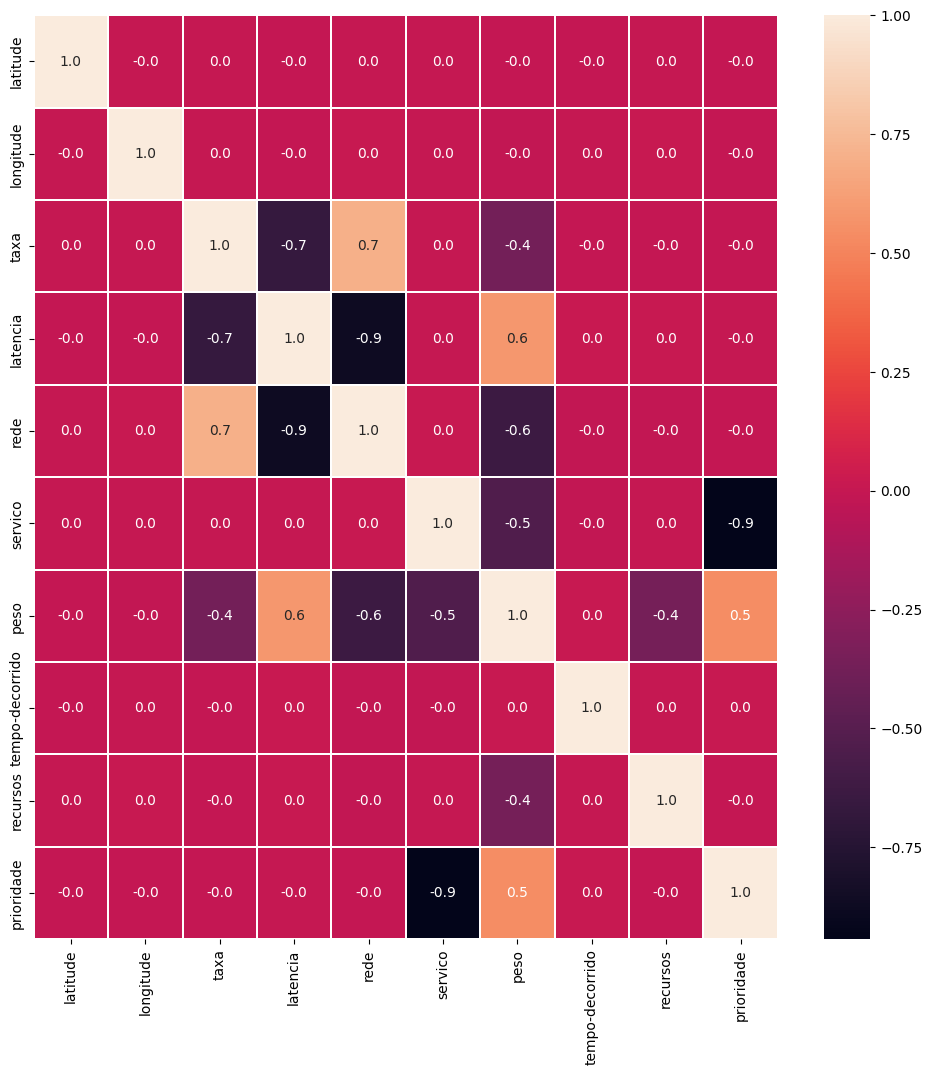

In [24]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, linewidths=.05, fmt= '.1f', ax=ax)

In [21]:
X = data[['latitude', 'longitude', 'taxa', 'latencia', 'rede', 'servico', 'RAM', 'CPU', 'CPU e RAM', 'peso']]

Y = data['prioridade'].values.tolist()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [26]:
import autosklearn.classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'autosklearn'

In [ ]:
# Carregar seu conjunto de dados
X = data.drop('prioridade', axis=1)  # Features
y = data['prioridade']  # Rótulos

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar o AutoML
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,   # Tempo máximo em segundos para a busca
    per_run_time_limit=30,         # Tempo máximo em segundos para cada modelo individual
    tmp_folder='/tmp/autosklearn_temp',
    output_folder='/tmp/autosklearn_output',
)

# Realizar a busca por modelos automaticamente
automl.fit(X_train, y_train)

# Prever com o melhor modelo encontrado
y_pred = automl.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/home/guilherme/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Erro quadrático médio (MSE): 0.0
Erro Médio Absoluto (MAE): 0.0
Coeficiente de determinação (R²): 1.0
Acuracia: 1.0
[[1259    0    0]
 [   0 1248    0]
 [   0    0 2542]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1259
           1       1.00      1.00      1.00      1248
           2       1.00      1.00      1.00      2542

    accuracy                           1.00      5049
   macro avg       1.00      1.00      1.00      5049
weighted avg       1.00      1.00      1.00      5049



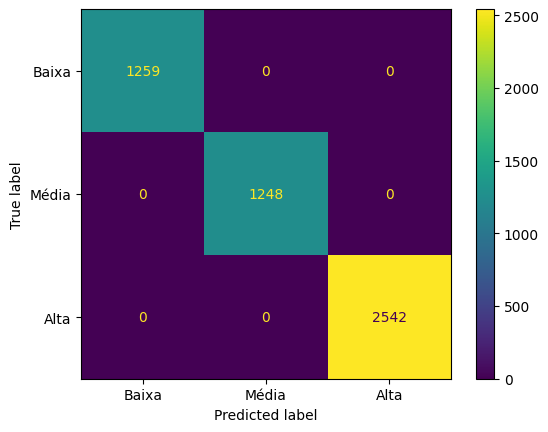

Tempo de execução: 0.9809279441833496


In [40]:
# Medir tempo de execução inicial
start_time = time.time()


clf = LogisticRegression()

clf = clf.fit(X_train,Y_train)
accuracy = clf.score(X_test, Y_test)
prediction = clf.predict(X_test)

cm = confusion_matrix(prediction, Y_test)
cr = classification_report(prediction, Y_test)

# Calcule as métricas de avaliação para a regressão linear
mse = mean_squared_error(Y_test, prediction)
r2 = r2_score(Y_test, prediction)
mae = mean_absolute_error(Y_test, prediction)



# Exiba as métricas de avaliação
print("Erro quadrático médio (MSE):", mse) 
print("Erro Médio Absoluto (MAE):", mae)
print("Coeficiente de determinação (R²):", r2)
print("Acuracia:", accuracy)
print(cm)
print(cr)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(prediction, Y_test), display_labels=['Baixa', 'Média', 'Alta']).plot()
plt.grid(False)
plt.show()

# Medir tempo de execução final
end_time = time.time()
execution_time = end_time - start_time

print("Tempo de execução:", execution_time)



In [ ]:
Tempo de execução: 11.65184998512268
Tempo de execução: 0.9809279441833496
Tempo de execução: 0.820061445236206

In [138]:
clf = clf.fit(X_train,Y_train)

/home/guilherme/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Erro quadrático médio (MSE): 0.6498316498316499
Erro Médio Absoluto (MAE): 0.4478114478114478
Coeficiente de determinação (R²): 0.06297208402982613
Acuracia: 0.6531986531986532
[[ 772    0    0]
 [   0    0    0]
 [ 510 1241 2526]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       772
           1       0.00      0.00      0.00         0
           2       1.00      0.59      0.74      4277

    accuracy                           0.65      5049
   macro avg       0.53      0.53      0.50      5049
weighted avg       0.94      0.65      0.74      5049



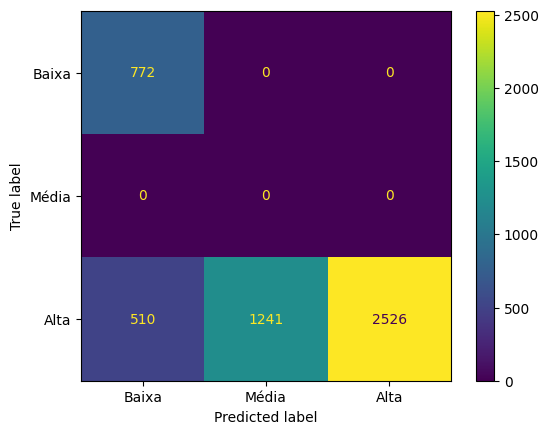

In [139]:
accuracy = clf.score(X_test, Y_test)
prediction = clf.predict(X_test)

cm = confusion_matrix(prediction, Y_test)
cr = classification_report(prediction, Y_test)

# Calcule as métricas de avaliação para a regressão linear
mse = mean_squared_error(Y_test, prediction)
r2 = r2_score(Y_test, prediction)
mae = mean_absolute_error(Y_test, prediction)



# Exiba as métricas de avaliação
print("Erro quadrático médio (MSE):", mse) 
print("Erro Médio Absoluto (MAE):", mae)
print("Coeficiente de determinação (R²):", r2)
print("Acuracia:", accuracy)
print(cm)
print(cr)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(prediction, Y_test), display_labels=['Baixa', 'Média', 'Alta']).plot()
plt.grid(False)
plt.show()

        Acurácia   F1
SVC     73,26%     0.76
Erro quadrático médio (MSE): 0.31313131313131315
Erro Médio Absoluto (MAE): 0.2826302238066944
Coeficiente de determinação (R²): 0.5336309888264972

kNN     92,55%      0.85  
Erro quadrático médio (MSE): 0.07803525450584274
Erro Médio Absoluto (MAE): 0.07763913646266588
Coeficiente de determinação (R²): 0.8842443763582029

Regressão Logistica  89,68%%  0.79
Erro quadrático médio (MSE): 0.10675381263616558
Erro Médio Absoluto (MAE): 0.10437710437710437
Coeficiente de determinação (R²): 0.8443009004811354

O KNN (K-Nearest Neighbors) e a regressão logística são algoritmos de aprendizado de máquina com características diferentes. Cada um tem suas vantagens e pode ser mais adequado para diferentes tipos de problemas. Vamos explorar algumas vantagens do KNN em relação à regressão logística:

Não requer suposições sobre a distribuição dos dados: O KNN é um método não paramétrico, o que significa que não faz suposições específicas sobre a distribuição dos dados. Ele se baseia nos vizinhos mais próximos para tomar decisões, o que o torna mais flexível em relação aos dados de entrada. Por outro lado, a regressão logística assume uma distribuição específica dos dados, geralmente uma distribuição binomial ou multinomial.

Capacidade de lidar com relações não lineares: O KNN pode lidar com relações não lineares entre os recursos e o resultado. Ele pode capturar decisões complexas que não podem ser modeladas facilmente por uma regressão logística, que é um modelo linear. O KNN não faz suposições sobre a forma funcional dos dados e pode se ajustar a padrões mais complexos.

Robustez em relação a outliers: O KNN pode ser mais robusto em relação a outliers em comparação com a regressão logística. Como o KNN se baseia nos vizinhos mais próximos, a presença de outliers pode ter menos impacto no resultado final. Em contraste, a regressão logística é influenciada pelos pontos de dados individuais e pode ser sensível a outliers.

Capacidade de lidar com classes desbalanceadas: O KNN pode lidar melhor com conjuntos de dados desbalanceados, onde as classes de destino têm proporções diferentes. Como a classificação é baseada nos vizinhos mais próximos, o KNN pode se adaptar a diferentes proporções das classes. A regressão logística pode ter problemas quando há um desequilíbrio significativo nas classes, pois pode tender a favorecer a classe majoritária.

Erro quadrático médio (MSE): 0.0
Erro Médio Absoluto (MAE): 0.0
Coeficiente de determinação (R²): 1.0
Acuracia: 0.6531986531986532
[[1282    0    0]
 [   0 1241    0]
 [   0    0 2526]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1282
           1       1.00      1.00      1.00      1241
           2       1.00      1.00      1.00      2526

    accuracy                           1.00      5049
   macro avg       1.00      1.00      1.00      5049
weighted avg       1.00      1.00      1.00      5049



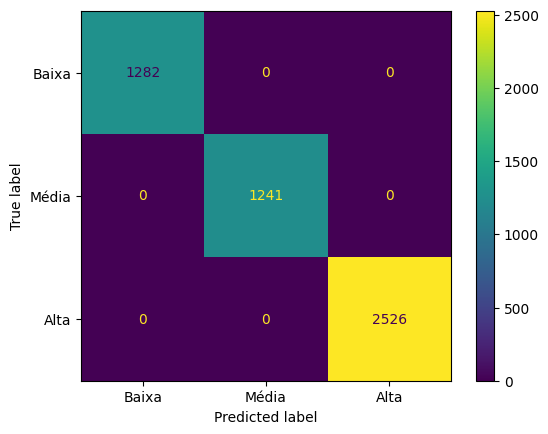

In [135]:
# Crie uma instância do modelo de regressão linear
regressor = KNeighborsClassifier()

# Treine o modelo com seus dados de treinamento
regressor.fit(X_train, Y_train)

# Faça previsões em novos dados
y_pred = regressor.predict(X_test)

# Calcule as métricas de avaliação para a regressão linear
mse = mean_squared_error(Y_test, prediction)
mae = mean_absolute_error(Y_test, prediction)
r2 = r2_score(Y_test, prediction)
accuracy = regressor.score(X_test, Y_test)
cr = classification_report(prediction, Y_test)
cm = confusion_matrix(prediction, Y_test)

# Exiba as métricas de avaliação
print("Erro quadrático médio (MSE):", mse) 
print("Erro Médio Absoluto (MAE):", mae)
print("Coeficiente de determinação (R²):", r2)
print("Acuracia:", accuracy)
print(cm)
print(cr)

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(prediction, Y_test), display_labels=['Baixa', 'Média', 'Alta']).plot()
plt.grid(False)
plt.show()

# kNN


In [25]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

In [26]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

In [27]:
grid_search = GridSearchCV(knn, param_grid, cv=5)

In [28]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [30]:
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_
print("Melhor valor de K:", best_k)
print("Acurácia correspondente:", best_accuracy)

Melhor valor de K: 1
Acurácia correspondente: 0.903904923599321


In [33]:
# Medir tempo de execução inicial
start_time = time.time()

knn_tuned = KNeighborsClassifier(n_neighbors=best_k)
knn_tuned.fit(X_train, Y_train)
y_pred = knn_tuned.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Acurácia no conjunto de teste:", accuracy)

# Medir tempo de execução final
end_time = time.time()
execution_time = end_time - start_time

print("Tempo de execução:", execution_time)



Acurácia no conjunto de teste: 0.9191919191919192
Tempo de execução: 0.2972574234008789


Erro quadrático médio (MSE): 0.08219449395919984
Erro Médio Absoluto (MAE): 0.0814022578728461
Coeficiente de determinação (R²): 0.8814792486657659
Acuracia: 0.9189938601703308
[[1142  132    0]
 [ 138 1033   61]
 [   2   76 2465]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1274
           1       0.83      0.84      0.84      1232
           2       0.98      0.97      0.97      2543

    accuracy                           0.92      5049
   macro avg       0.90      0.90      0.90      5049
weighted avg       0.92      0.92      0.92      5049



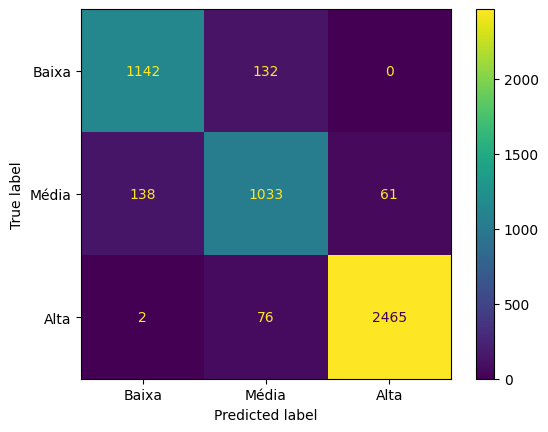

In [134]:
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
cr = classification_report(y_pred, Y_test)
cm = confusion_matrix(y_pred, Y_test)

# Exiba as métricas de avaliação
print("Erro quadrático médio (MSE):", mse) 
print("Erro Médio Absoluto (MAE):", mae)
print("Coeficiente de determinação (R²):", r2)
print("Acuracia:", accuracy)
print(cm)
print(cr)

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred, Y_test), display_labels=['Baixa', 'Média', 'Alta']).plot()
plt.grid(False)
plt.show()

## TENTATIVA DE ALGO

In [84]:
X = data[['taxa', 'latencia', 'rede', 'servico', 'RAM', 'CPU', 'CPU e RAM', 'peso']]

Y = data['prioridade'].values.tolist()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [85]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, mean_absolute_error, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [34]:
clf = LinearRegression()
clf = clf.fit(X_train,Y_train)


In [35]:
accuracy = clf.score(X_test, Y_test)
prediction = clf.predict(X_test)

cm = confusion_matrix(prediction, Y_test)
cr = classification_report(prediction, Y_test)

# Calcule as métricas de avaliação para a regressão linear
mse = mean_squared_error(Y_test, prediction)
r2 = r2_score(Y_test, prediction)
mae = mean_absolute_error(Y_test, prediction)



# Exiba as métricas de avaliação
print("Erro quadrático médio (MSE):", mse) 
print("Erro Médio Absoluto (MAE):", mae)
print("Coeficiente de determinação (R²):", r2)
print("Acuracia:", accuracy)
print(cm)
print(cr)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(prediction, Y_test), display_labels=['Baixa', 'Média', 'Alta']).plot()
plt.grid(False)
plt.show()

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets